# Plotting with Matplotlib
Use Matplotlib to create bar charts that visualize the conclusions you made with groupby and query.

In [1]:
# Import necessary packages and load `winequality_edited.csv`
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 


df = pd.read_csv('winequality_edited.csv')
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### #1: Do wines with higher alcoholic content receive better ratings?
Create a bar chart with one bar for low alcohol and one bar for high alcohol wine samples. This first one is filled out for you.

In [2]:
# Use query to select each group and get its mean quality
median = df['alcohol'].median()
low = df.query('alcohol < {}'.format(median))
high = df.query('alcohol >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

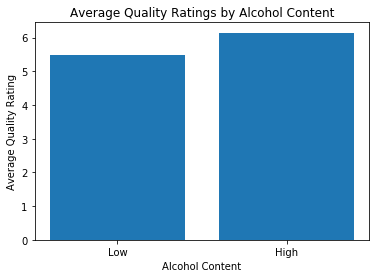

In [3]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

### #2: Do sweeter wines receive higher ratings?
Create a bar chart with one bar for low residual sugar and one bar for high residual sugar wine samples.

In [4]:
# Use query to select each group and get its mean quality
median = df['residual_sugar'].median()
low_sugar = df.query('residual_sugar < {}'.format(median))
high_sugar = df.query('residual_sugar >= {}'.format(median))

mean_quality_low_sugar = low_sugar['quality'].mean()
mean_quality_high_sugar = high_sugar['quality'].mean()

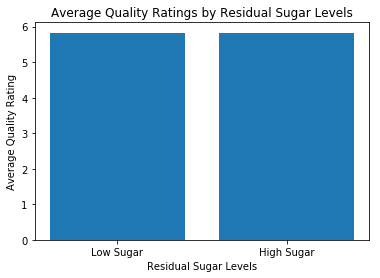

In [5]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low_sugar, mean_quality_high_sugar]
labels = ['Low Sugar', 'High Sugar']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Residual Sugar Levels')
plt.xlabel('Residual Sugar Levels')
plt.ylabel('Average Quality Rating');


### #3: What level of acidity receives the highest average rating?
Create a bar chart with a bar for each of the four acidity levels.

In [6]:
# Use groupby to get the mean quality for each acidity level
ac_levels = df.groupby(['acidity_levels'], as_index=False)['quality'].mean()

ac_levels

,acidity_levels,quality
0,high,5.783469
1,low,5.859593
2,medium,5.850832
3,mod_high,5.784540


ValueError: shape mismatch: objects cannot be broadcast to a single shape

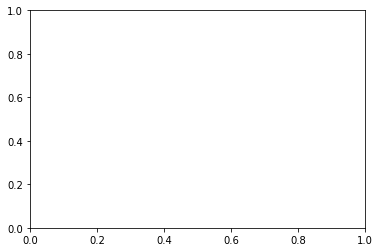

In [7]:
# Create a bar chart with proper labels
locations = [4, 1, 3, 4]
heights = ac_levels

labels = ['Low', 'Medium', 'Moderately High', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Acidity Labels')
plt.xlabel('Acidity Levels')
plt.ylabel('Average Quality Rating');


### Bonus: Create a line plot for the data in #3
You can use pyplot's [plot](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) function for this.

Compare this with the bar chart. How might showing this visual instead of the bar chart affect someone's conclusion about this data?